In [ ]:
# Choose k
# Random k points
# classify as KNN
# compute centroid

In [82]:
import numpy as np
import random

def euclidean_distance(x1,x2):
  return np.sqrt(np.sum((x1-x2)**2))

class Kmeans:
  def __init__(self, K):
    self.K = K
    self.centroids = []

  def centroids_init(self, X):
    indices= random.sample(range(len(X)), self.K)
    for i in indices:
      self.centroids.append(X[i,:])
    return np.array(self.centroids)

  def clf(self, X):
    indices = []
    for x in X:
      distances = []
      distances = [euclidean_distance(x,c) for c in self.centroids]
      indices.append(np.argmin(distances))
    return np.array(indices)

  def compute_centroids(self, X, classes):
    self.centroids = []
    for i in np.unique(classes):
      points = np.array([X[key] for key, cl in enumerate(classes) if cl == i])
      self.centroids.append(np.mean(points, axis = 0))
    return np.array(self.centroids)

  def fit(self, X, n_iters = 10):
    # Random k centroids
    self.centroids = self.centroids_init(X)
    
    for i in range(n_iters):
      # Classify 
      classes = self.clf(X)

      # Compute new centroids
      self.centroids = self.compute_centroids(X, classes)

  def predict(self, X):
    classes = self.clf(X)
    return classes


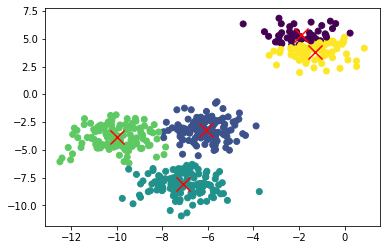

In [94]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X,y = make_blobs(500, centers = 4, random_state = 1)
X.shape, y.shape

kmeans = Kmeans(K = 5)
kmeans.fit(X)
centroids = kmeans.centroids
classes = kmeans.clf(X)
plt.scatter(X[:,0], X[:,1], c= classes)
plt.scatter(centroids[:,0], centroids[:,1], marker= 'x', s=200, c= 'r')